In [43]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

tf.__version__

'2.17.0'

In [107]:
# Creating Features and labels

X = tf.range(1, 101, 4)
y = tf.range(11, 111, 4)

X, y

(<tf.Tensor: shape=(25,), dtype=int32, numpy=
 array([ 1,  5,  9, 13, 17, 21, 25, 29, 33, 37, 41, 45, 49, 53, 57, 61, 65,
        69, 73, 77, 81, 85, 89, 93, 97])>,
 <tf.Tensor: shape=(25,), dtype=int32, numpy=
 array([ 11,  15,  19,  23,  27,  31,  35,  39,  43,  47,  51,  55,  59,
         63,  67,  71,  75,  79,  83,  87,  91,  95,  99, 103, 107])>)

In [125]:

# Creating Training and Testing data

X_train = X[:20]
X_test = X[20:]

y_train = y[:20]
y_test = y[20:]

len(X), len(X_train), len(X_test), len(y), len(y_train), len(y_test)

(25, 20, 5, 25, 20, 5)

In [237]:
# Now build Neural Netwrok

# set random seed

tf.random.set_seed(42)

#               1. Create a model

model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation = None, input_shape = (1, )),
    tf.keras.layers.Dense(1, input_shape = (1, ))
])


#               2. Compile a model

model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
              metrics = ["mae"])



#               3. Fitting a model

loss = model.fit(X_train, y_train, epochs = 220)

Epoch 1/220


c:\Users\Muhammad Abu Bakar\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 64.9801 - mae: 64.9801
Epoch 2/220
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 58.5832 - mae: 58.5832
Epoch 3/220
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 52.3102 - mae: 52.3102
Epoch 4/220
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 46.1329 - mae: 46.1329
Epoch 5/220
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - loss: 40.0209 - mae: 40.0209
Epoch 6/220
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 33.9459 - mae: 33.9459
Epoch 7/220
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 27.8823 - mae: 27.8823
Epoch 8/220
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 21.8015 - mae: 21.8015
Epoch 9/220
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 15.6713 - mae: 15.6713
Epoch 10/220
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 9.4582 - mae: 9.4582
Epoch 11/220
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 3.8648 - mae: 3.8648
Epoch 12/220
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 6.3427 - mae: 6.3427
Epoch 13/220
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms

<Axes: >

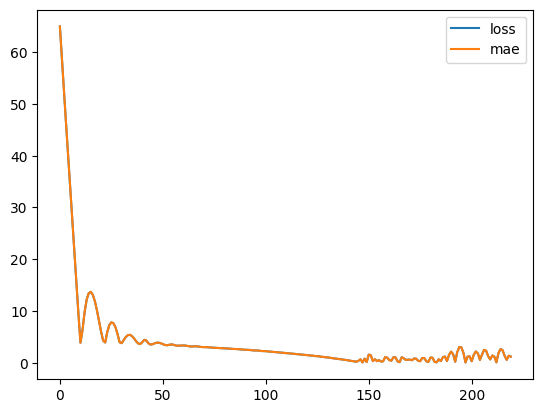

In [238]:
pd.DataFrame(loss.history).plot()

In [239]:
len(X_test), len(y_test)

(5, 5)

In [240]:
X_test, y_test

(<tf.Tensor: shape=(5,), dtype=int32, numpy=array([81, 85, 89, 93, 97])>,
 <tf.Tensor: shape=(5,), dtype=int32, numpy=array([ 91,  95,  99, 103, 107])>)

In [241]:
y_pred = model.predict(X_test)

y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


array([[ 90.82221 ],
       [ 94.821754],
       [ 98.821304],
       [102.82082 ],
       [106.82037 ]], dtype=float32)

In [242]:

def plot_predictions(train_data = X_train,
            train_label = y_train,
            test_data = X_test,
            test_label = y_test,
            predictions = y_pred):

    """
        Plots training data, test data and compares predictions to ground truth labels.
    """

    plt.figure(figsize = (10, 7))

    plt.scatter(train_data, train_label, c = "black", label = "Train Data")

    plt.scatter(test_data, test_label, c = "blue", label = "Test Data")

    plt.scatter(test_data, predictions, c = "red", label = "Prediction")

    plt.legend()

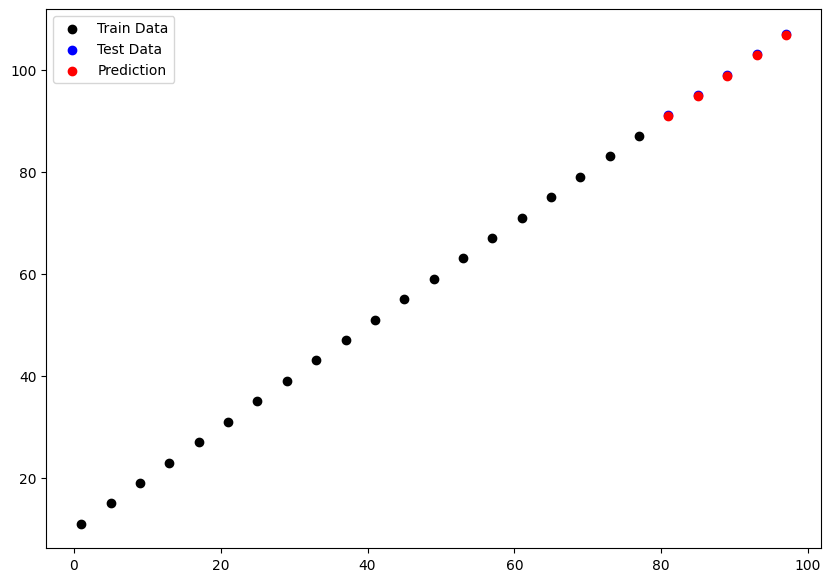

In [243]:
plot_predictions()

In [244]:
# Saving the model

model.save("saved_model.h5")

In [246]:
# load the model

loaded_model = tf.keras.models.load_model("saved_model.h5")

In [249]:
loaded_model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


array([[ 90.82221 ],
       [ 94.821754],
       [ 98.821304],
       [102.82082 ],
       [106.82037 ]], dtype=float32)